In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [52]:
url="https://www.hubertiming.com/results/2015MLK" #open link
html = urlopen(url)

In [53]:
soup = BeautifulSoup(html)

In [54]:
data = []
allrows= soup.find_all("tr")
for row in allrows :
    row_list = row.find_all("td")
    dataRow= []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
  
data = data[6:] 

In [55]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [56]:
df = pd.DataFrame(data)

In [57]:
df.columns = header_list
print(df.head())

  Place   Bib            Name Gender Age      City State Chip Time Chip Pace  \
0     2  1539  PHILIP QUINTON      M  15  PORTLAND    OR     15:22      5:54   
1     3  1568      DAN FRANEK      M  49       PDX    OR     15:27      5:56   
2     4  1386      JOE DUDMAN      M  51  PORTLAND    OR     15:36      6:00   
3     5  1436   MICHAEL DAVIS      M  37  PORTLAND    OR     15:39      6:01   
4     6  1451       MAX HODGE      M  15  PORTLAND    OR     15:41      6:01   

  Gender Place       Age Group Age Group Place Time to Start Gun Time  
0      2 of 83  M 20 and Under         1 of 10          0:02    15:24  
1      3 of 83         M 40-54         1 of 17          0:01    15:28  
2      4 of 83         M 40-54         2 of 17          0:01    15:37  
3      5 of 83         M 21-39         2 of 45          0:03    15:42  
4      6 of 83  M 20 and Under         2 of 10          0:00    15:41  


In [58]:
df.shape

(213, 14)

In [59]:
df2 = df.dropna(how='any')
df.shape

(213, 14)

In [60]:
df2['Year'] = 2015

In [62]:
df2['Chip Time'] = df2['Chip Time'].apply(lambda x : x.rjust(5, '0').rjust(6, ':').rjust(8, '0'))
df2['ChipTime_minutes'] = df['Chip Time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [63]:
time_list = df2['Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [64]:
df2['Runner_mins'] = time_mins
df2.head(5)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Year,ChipTime_minutes,Runner_mins
0,2,1539,PHILIP QUINTON,M,15,PORTLAND,OR,00:15:22,5:54,2 of 83,M 20 and Under,1 of 10,0:02,15:24,2015,922,15.366667
1,3,1568,DAN FRANEK,M,49,PDX,OR,00:15:27,5:56,3 of 83,M 40-54,1 of 17,0:01,15:28,2015,927,15.450000
2,4,1386,JOE DUDMAN,M,51,PORTLAND,OR,00:15:36,6:00,4 of 83,M 40-54,2 of 17,0:01,15:37,2015,936,15.600000
3,5,1436,MICHAEL DAVIS,M,37,PORTLAND,OR,00:15:39,6:01,5 of 83,M 21-39,2 of 45,0:03,15:42,2015,939,15.650000
4,6,1451,MAX HODGE,M,15,PORTLAND,OR,00:15:41,6:01,6 of 83,M 20 and Under,2 of 10,0:00,15:41,2015,941,15.683333


Text(0.5, 1.0, 'Comparsion of average minutes run by male and female')

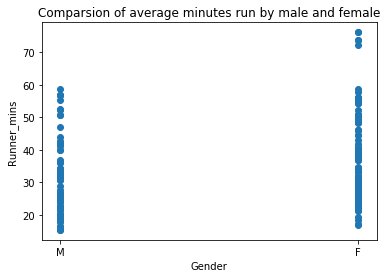

In [65]:
plt.scatter(df2['Gender'], df2['Runner_mins'])
plt.xlabel('Gender')
plt.ylabel('Runner_mins')
plt.title("Comparsion of average minutes run by male and female") 

In [66]:
df2.describe(include=[np.number])

,Year,ChipTime_minutes,Runner_mins
count,213.0,213.000000,213.000000
mean,2015.0,1962.469484,34.427856
std,0.0,759.310838,13.231640
min,2015.0,72.000000,15.366667
25%,2015.0,1449.000000,24.800000
50%,2015.0,1848.000000,30.950000
75%,2015.0,2451.000000,42.850000
max,2015.0,3527.000000,76.216667


Text(0, 0.5, 'Run time')

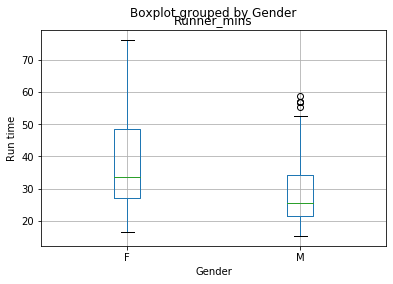

In [67]:
df2.boxplot(column='Runner_mins', by = 'Gender')
plt.ylabel('Run time')

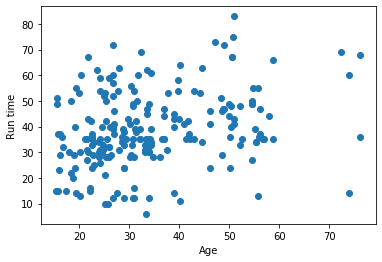

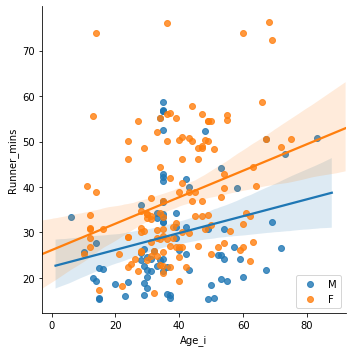

In [68]:
import seaborn as sns, numpy as np
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how ='any', inplace = True)
df = plt.scatter(df2['Runner_mins'], df2['Age_i'])
df = plt.ylabel('Run time')
df= plt.xlabel('Age')
df = plt.show()

sns.lmplot( x='Age_i', y='Runner_mins', data=df2, fit_reg=True, hue='Gender', legend=False)
plt.legend(loc='lower right')

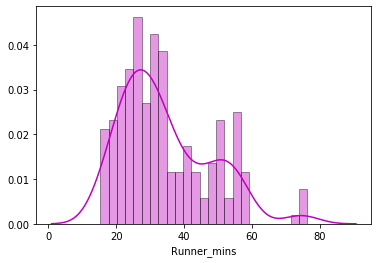

In [69]:
import seaborn as sns, numpy as np
x = df2['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

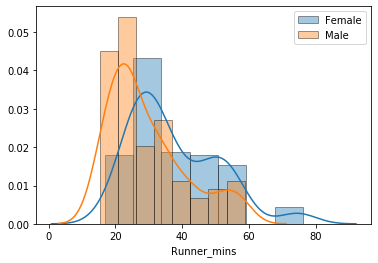

In [70]:
f_fuko = df2.loc[df2['Gender']=='F']['Runner_mins']
m_fuko = df2.loc[df2['Gender']=='M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [72]:
g_stats = df2.groupby("Gender", as_index=True).describe()
print(g_stats)

         Year                                                       \
        count    mean  std     min     25%     50%     75%     max   
Gender                                                               
F       131.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
M        82.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   

       ChipTime_minutes               ... Runner_mins             Age_i  \
                  count         mean  ...         75%        max  count   
Gender                                ...                                 
F                 131.0  2081.702290  ...   48.616667  76.216667  131.0   
M                  82.0  1771.987805  ...   34.316667  58.733333   82.0   

                                                             
             mean        std   min   25%   50%    75%   max  
Gender                                                       
F       39.068702  14.400957  10.0  30.0  38.0  48.00  75.0  
M       38.134146  15.251

Text(0, 0.5, 'Run time')

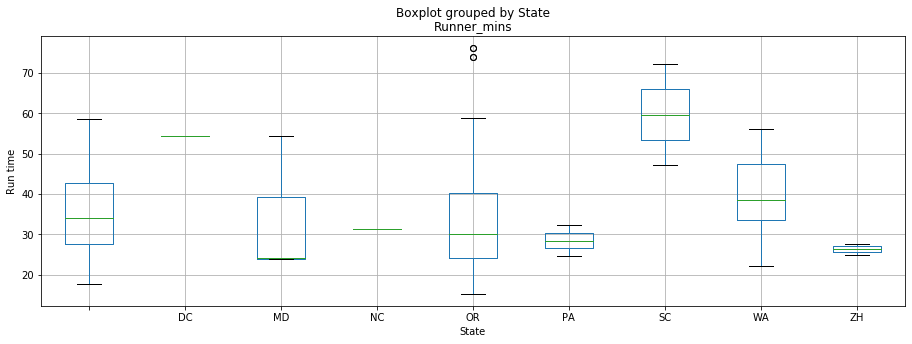

In [73]:
df2.boxplot(column='Runner_mins', by = 'State')
plt.ylabel('Run time')

Text(0, 0.5, 'Run time')

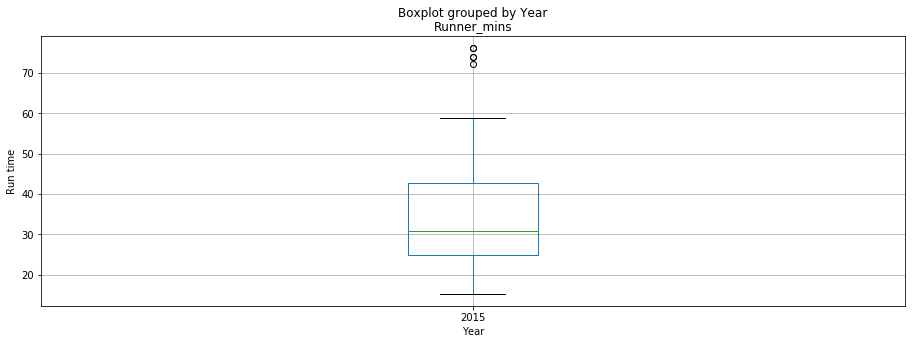

In [74]:
df2.boxplot(column='Runner_mins', by = 'Year')
plt.ylabel('Run time')

In [75]:
df2.to_csv('final2015.csv')